In [ ]:
#!pip install albumentations
#!pip install labelme

In [ ]:
import os
import time
import uuid
import cv2

In [ ]:
IMAGES_PATH= os.path.join('/content/drive/MyDrive/Colab Notebooks/data11','images')
number_images= 30

In [ ]:
# cap=cv2.VideoCapture(0)
# for imgnum in range(number_images):
#   print('Collecting image {}'.format(imgnum))
#   ret,frame=cap.read()
#   imgname=os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
#   cv2.imwrite(imgname,frame)
#   cv2.imshow('frame',frame)
#   time.sleep(0.5)

#   if cv2.waitKey(1) & 0xFF==ord('q'):
#     break
# cap.release()
# cv2.destroyAllWindows()

In [ ]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [ ]:
gpus= tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

In [ ]:
images= tf.data.Dataset.list_files('/content/drive/MyDrive/Colab Notebooks/data11/images/*.jpg',shuffle=False)

In [ ]:
def load_image(x):
  byte_img= tf.io.read_file(x)
  img= tf.io.decode_jpeg(byte_img)
  return img

In [ ]:
images.as_numpy_iterator().next()

b'/content/drive/MyDrive/Colab Notebooks/data11/images/6446fe67-5b02-11f0-b68a-744ca14ea082.jpg'

In [ ]:
images= images.map(load_image)

array([[[203, 186, 194],
        [200, 185, 192],
        [199, 183, 193],
        ...,
        [175, 202, 195],
        [179, 204, 201],
        [185, 207, 205]],

       [[204, 189, 196],
        [201, 186, 193],
        [197, 184, 193],
        ...,
        [180, 205, 199],
        [184, 206, 203],
        [187, 207, 206]],

       [[203, 190, 197],
        [199, 188, 194],
        [196, 185, 191],
        ...,
        [185, 208, 202],
        [188, 207, 205],
        [190, 206, 205]],

       ...,

       [[165, 167, 154],
        [159, 161, 148],
        [155, 157, 144],
        ...,
        [ 75,  56,  58],
        [ 76,  57,  59],
        [ 76,  57,  61]],

       [[157, 160, 153],
        [153, 156, 147],
        [151, 154, 145],
        ...,
        [ 82,  52,  60],
        [ 84,  52,  63],
        [ 86,  53,  64]],

       [[151, 156, 150],
        [147, 152, 146],
        [148, 151, 144],
        ...,
        [ 85,  49,  59],
        [ 88,  50,  65],
        [ 91,  50,  66]]], dtype=uint8)
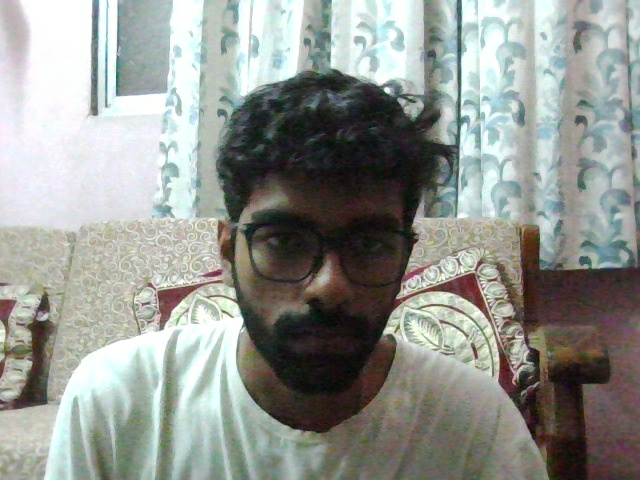

In [ ]:
images.as_numpy_iterator().next()

In [ ]:
image_gen= images.batch(4).as_numpy_iterator()

In [ ]:
plot_images= image_gen.next()

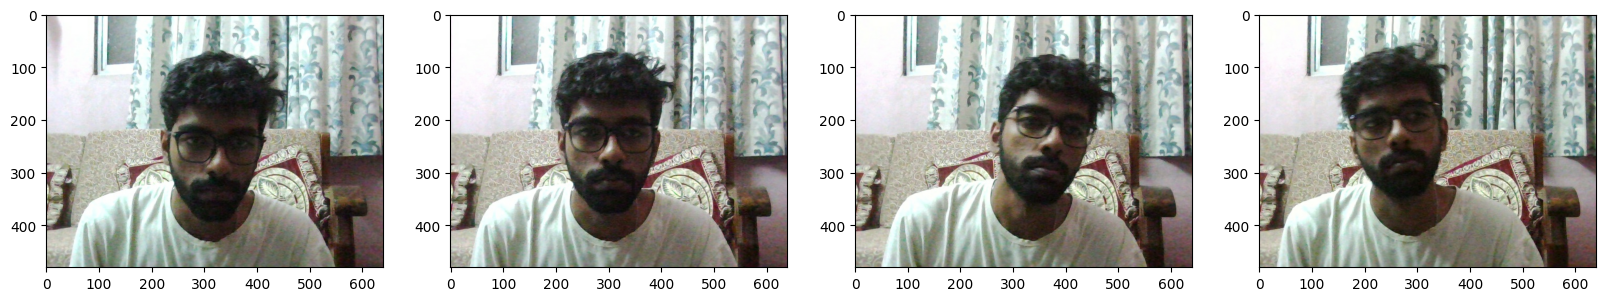

In [ ]:
fig, ax= plt.subplots(ncols=4,figsize=(20,20))
for idx, image in enumerate(plot_images):
  ax[idx].imshow(image)
plt.show()

In [ ]:
# 63 to train
# 14 to test & 13 to val

In [ ]:
for folder in ['train','test','val']:
  for file in os.listdir(os.path.join('/content/drive/MyDrive/Colab Notebooks/data11',folder,'images')):

    filename = file.split('.')[0]+'.json'
    existing_filepath= os.path.join('/content/drive/MyDrive/Colab Notebooks/data11/labels',filename)
    if os.path.exists(existing_filepath):
      new_filepath= os.path.join('/content/drive/MyDrive/Colab Notebooks/data11',folder,'labels',filename)
      os.replace(existing_filepath,new_filepath)

    else:
      print(f'{filename} Not found')

In [ ]:
import albumentations as alb

In [ ]:
augmentor= alb.Compose([alb.RandomCrop(width=450,height=450),
                        alb.HorizontalFlip(p=0.5),
                        alb.RandomBrightnessContrast(p=0.2),
                        alb.RandomGamma(p=0.2),
                        alb.RGBShift(p=0.2),
                        alb.VerticalFlip(p=0.5)],
                        bbox_params= alb.BboxParams(format='albumentations', label_fields=['class_labels']))

In [ ]:
img=cv2.imread(os.path.join('/content/drive/MyDrive/Colab Notebooks/data11','train','images','671855af-5b02-11f0-a671-744ca14ea082.jpg'))

array([[[213, 203, 209],
        [207, 197, 203],
        [200, 193, 198],
        ...,
        [158, 170, 172],
        [157, 168, 172],
        [152, 164, 168]],

       [[212, 201, 209],
        [207, 197, 203],
        [200, 192, 199],
        ...,
        [159, 169, 169],
        [157, 169, 171],
        [154, 166, 168]],

       [[208, 199, 209],
        [204, 196, 203],
        [200, 191, 201],
        ...,
        [157, 164, 159],
        [155, 164, 161],
        [153, 161, 160]],

       ...,

       [[147, 168, 170],
        [142, 163, 165],
        [137, 158, 160],
        ...,
        [ 57,  69,  79],
        [ 57,  69,  79],
        [ 56,  69,  77]],

       [[138, 167, 171],
        [134, 163, 167],
        [132, 159, 163],
        ...,
        [ 60,  68,  75],
        [ 61,  70,  74],
        [ 60,  69,  72]],

       [[133, 166, 169],
        [129, 162, 165],
        [128, 159, 162],
        ...,
        [ 60,  67,  70],
        [ 61,  68,  71],
        [ 61,  69,  69]]], dtype=uint8)
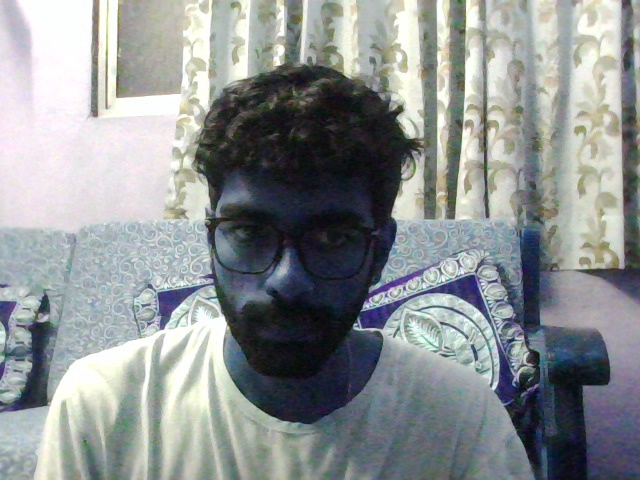

In [ ]:
img

In [ ]:
with open(os.path.join('/content/drive/MyDrive/Colab Notebooks/data11','train','labels','671855af-5b02-11f0-a671-744ca14ea082.json'),'r') as f:
  label = json.load(f)

In [ ]:
label['shapes'][0]['points']

[[194.72222222222223, 66.11111111111111],
 [416.38888888888886, 378.3333333333333]]

In [ ]:
coords= [0,0,0,0]
coords[0]= label['shapes'][0]['points'][0][0]
coords[1]= label['shapes'][0]['points'][0][1]
coords[2]= label['shapes'][0]['points'][1][0]
coords[3]= label['shapes'][0]['points'][1][1]

In [ ]:
coords

[194.72222222222223, 66.11111111111111, 416.38888888888886, 378.3333333333333]

In [ ]:
coords= list(np.divide(coords,[640,480,640,480]))

In [ ]:
coords

[np.float64(0.3042534722222222),
 np.float64(0.13773148148148148),
 np.float64(0.6506076388888888),
 np.float64(0.7881944444444444)]

In [ ]:
augmented= augmentor(image=img,bboxes=[coords],class_labels=['face'])

array([[[201, 202, 184],
        [214, 220, 200],
        [233, 239, 219],
        ...,
        [160, 159, 147],
        [156, 157, 145],
        [155, 156, 144]],

       [[197, 201, 181],
        [208, 215, 192],
        [227, 233, 213],
        ...,
        [160, 159, 147],
        [158, 157, 145],
        [156, 157, 145]],

       [[207, 212, 189],
        [213, 220, 197],
        [226, 235, 214],
        ...,
        [158, 159, 147],
        [157, 158, 146],
        [157, 160, 148]],

       ...,

       [[ 15,  40,  48],
        [ 11,  34,  35],
        [  2,  24,  21],
        ...,
        [154, 170, 150],
        [155, 171, 151],
        [159, 175, 155]],

       [[ 18,  44,  52],
        [ 13,  38,  39],
        [  0,  24,  21],
        ...,
        [154, 168, 148],
        [152, 166, 146],
        [158, 171, 154]],

       [[ 22,  48,  56],
        [ 14,  41,  43],
        [  0,  24,  22],
        ...,
        [155, 169, 149],
        [154, 166, 146],
        [158, 169, 152]]], dtype=uint8)
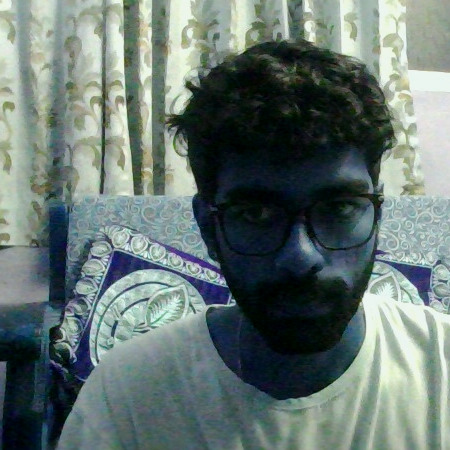

In [ ]:
augmented['image']

In [ ]:
augmented['bboxes']

[[0.3835802374945747,
  0.0935802427927653,
  0.876172858344184,
  0.7874073791503906]]

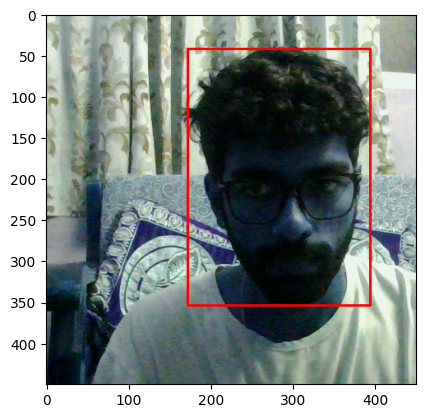

In [ ]:
cv2.rectangle(augmented['image'],
              tuple(np.multiply(augmented['bboxes'][0][:2],[450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:],[450,450]).astype(int)),
              (255,0,0),2)

plt.imshow(augmented['image'])

In [ ]:
for partition in ['train','test','val']:
  for image in os.listdir(os.path.join('/content/drive/MyDrive/Colab Notebooks/data11',partition,'images')):
    img = cv2.imread(os.path.join('/content/drive/MyDrive/Colab Notebooks/data11',partition,'images',image))

    coords= [0,0,0.00001,0.00001]
    label_path = os.path.join('/content/drive/MyDrive/Colab Notebooks/data11',partition,'labels',f'{image.split(".")[0]}.json')
    if os.path.exists(label_path):
      with open(label_path,'r') as f:
        label= json.load(f)

      coords[0]= label['shapes'][0]['points'][0][0]
      coords[1]= label['shapes'][0]['points'][0][1]
      coords[2]= label['shapes'][0]['points'][1][0]
      coords[3]= label['shapes'][0]['points'][1][1]
      coords= list(np.divide(coords,[640,480,640,480]))

    try:
      for x in range(60):
        augmented= augmentor(image=img,bboxes=[coords],class_labels=['face'])
        cv2.imwrite(os.path.join('/content/drive/MyDrive/Colab Notebooks/data11/aug_data',partition,'images',f'{image.split(".")[0]}.{x}.jpg'),augmented['image'])

        annotation={}
        annotation['image']= image

        if os.path.exists(label_path):
          if len(augmented['bboxes'])==0:
            annotation['bbox']= [0,0,0,0]
            annotation['class']= 0

          else:
            annotation['bbox']=augmented['bboxes'][0]
            annotation['class']=1

        else:
          annotation['bbox']=[0,0,0,0]
          annotation['class']=0

        with open(os.path.join('/content/drive/MyDrive/Colab Notebooks/data11/aug_data',partition,'labels',f'{image.split(".")[0]}.{x}.json'),'w') as f:
          json.dump(annotation,f)

    except Exception as e:
      print(e)

x_max is less than or equal to x_min for bbox [0.87890625 0.81944442 0.47786459 0.08101851 0.        ].
x_max is less than or equal to x_min for bbox [0.63498265 0.90393519 0.17751735 0.00578704 0.        ].
x_max is less than or equal to x_min for bbox [0.66970485 0.89351851 0.27213541 0.08912037 0.        ].
x_max is less than or equal to x_min for bbox [0.82161456 0.98726851 0.23828125 0.04282407 0.        ].
x_max is less than or equal to x_min for bbox [0.69574654 0.95023149 0.2608507  0.09953704 0.        ].
x_max is less than or equal to x_min for bbox [0.2842882  0.29166666 0.         0.88228089 0.        ].
x_max is less than or equal to x_min for bbox [0.4639757  0.85069442 0.07421875 0.13078703 0.        ].
x_max is less than or equal to x_min for bbox [0.23828125 0.22800925 0.         0.82729858 0.        ].
x_max is less than or equal to x_min for bbox [0.19140625 0.28472221 0.         0.91124719 0.        ].


In [ ]:
train_images= tf.data.Dataset.list_files('/content/drive/MyDrive/Colab Notebooks/data11/aug_data/train/images/*.jpg',shuffle=False)
train_images= train_images.map(load_image)
train_images= train_images.map(lambda x: tf.image.resize(x,(120,120)))
train_images= train_images.map(lambda x: x/255)

In [ ]:
test_images= tf.data.Dataset.list_files('/content/drive/MyDrive/Colab Notebooks/data11/aug_data/test/images/*.jpg',shuffle=False)
test_images= test_images.map(load_image)
test_images= test_images.map(lambda x: tf.image.resize(x,(120,120)))
test_images= test_images.map(lambda x: x/255)

In [ ]:
val_images= tf.data.Dataset.list_files('/content/drive/MyDrive/Colab Notebooks/data11/aug_data/val/images/*.jpg',shuffle=False)
val_images= val_images.map(load_image)
val_images= val_images.map(lambda x: tf.image.resize(x,(120,120)))
val_images= val_images.map(lambda x: x/255)

In [ ]:
train_images.as_numpy_iterator().next()

array([[[0.6788603 , 0.7210172 , 0.7216299 ],
        [0.67126226, 0.7269608 , 0.7254902 ],
        [0.6851103 , 0.7488358 , 0.72677696],
        ...,
        [0.77144605, 0.8853554 , 0.90496325],
        [0.8204657 , 0.9211397 , 0.9096814 ],
        [0.8639706 , 0.9520221 , 0.91433823]],

       [[0.6789216 , 0.72745097, 0.71911764],
        [0.6856005 , 0.73180145, 0.73039216],
        [0.71666664, 0.76029414, 0.74460787],
        ...,
        [0.77824754, 0.8908701 , 0.87420344],
        [0.8220588 , 0.89656866, 0.8726103 ],
        [0.83204657, 0.89528185, 0.8802083 ]],

       [[0.6356005 , 0.71697307, 0.6929534 ],
        [0.67898285, 0.7416667 , 0.72990197],
        [0.6646446 , 0.7520221 , 0.72205883],
        ...,
        [0.7083946 , 0.79859066, 0.7745098 ],
        [0.87352943, 0.93333334, 0.9132353 ],
        [0.84295344, 0.8949142 , 0.8916054 ]],

       ...,

       [[0.4696691 , 0.5360294 , 0.46427697],
        [0.5844363 , 0.623652  , 0.58707106],
        [0.71844363, 0

In [ ]:
def load_labels(label_path):
  with open(label_path.numpy(),'r',encoding='utf-8') as f:
    label= json.load(f)

  return (tf.cast([label['class']], tf.uint8), tf.cast(label['bbox'], tf.float16))

In [ ]:
train_labels=tf.data.Dataset.list_files('/content/drive/MyDrive/Colab Notebooks/data11/aug_data/train/labels/*.json',shuffle=False)
train_labels= train_labels.map(lambda x: tf.py_function(load_labels,[x],[tf.uint8,tf.float16])) # Specify two output types

In [ ]:
test_labels=tf.data.Dataset.list_files('/content/drive/MyDrive/Colab Notebooks/data11/aug_data/test/labels/*.json',shuffle=False)
test_labels= test_labels.map(lambda x: tf.py_function(load_labels,[x],[tf.uint8,tf.float16])) # Specify two output types

In [ ]:
val_labels=tf.data.Dataset.list_files('/content/drive/MyDrive/Colab Notebooks/data11/aug_data/val/labels/*.json',shuffle=False)
val_labels= val_labels.map(lambda x: tf.py_function(load_labels,[x],[tf.uint8,tf.float16])) # Specify two output types

In [ ]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.08826, 0.1403 , 0.581  , 0.834  ], dtype=float16))

In [ ]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(3420, 3420, 780, 780, 660, 660)

In [ ]:
train=tf.data.Dataset.zip((train_images,train_labels))
train= train.shuffle(5000)
train= train.batch(8)
train = train.map(lambda image, label: (image, (tf.ensure_shape(label[0], [None, 1]), tf.ensure_shape(label[1], [None, 4]))))
train= train.prefetch(4)

In [ ]:
test= tf.data.Dataset.zip((test_images,test_labels))
test= test.shuffle(1300)
test= test.batch(8)
test = test.map(lambda image, label: (image, (tf.ensure_shape(label[0], [None, 1]), tf.ensure_shape(label[1], [None, 4]))))
test= test.prefetch(4)

In [ ]:
val= tf.data.Dataset.zip((val_images,val_labels))
val= val.shuffle(1000)
val= val.batch(8)
val = val.map(lambda image, label: (image, (tf.ensure_shape(label[0], [None, 1]), tf.ensure_shape(label[1], [None, 4]))))
val= val.prefetch(4)

In [ ]:
data_samples= train.as_numpy_iterator()

In [ ]:
res = data_samples.next()

In [ ]:
# import time
# start = time.time()
# print("Getting next sample...")
# res = data_samples.next()
# print("Sample retrieved.")
# print("Time taken:", time.time() - start)

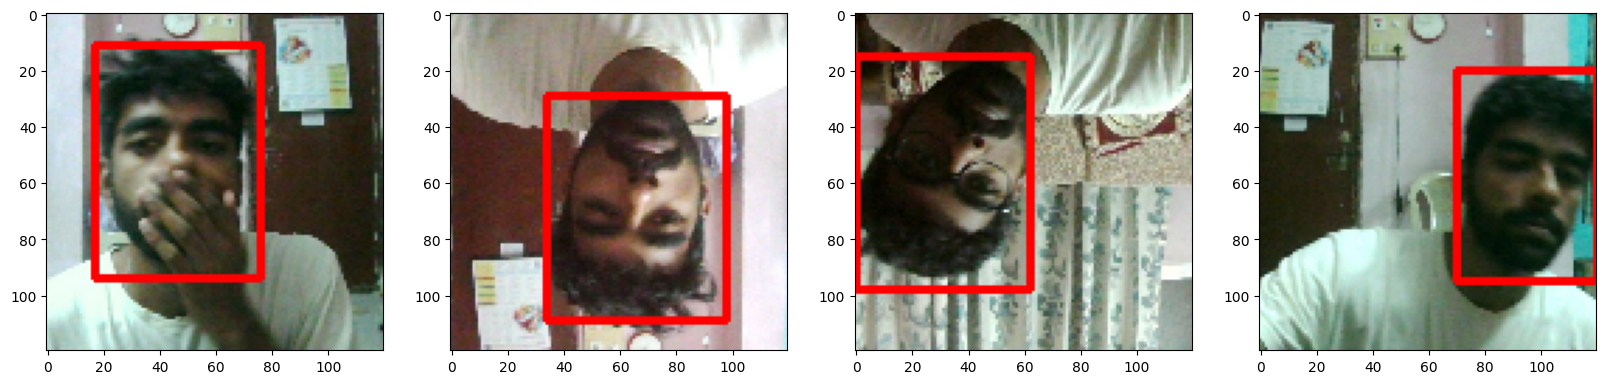

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4):
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]

    # Make the image writable before drawing the rectangle
    sample_image_writable = np.copy(sample_image)

    cv2.rectangle(sample_image_writable,
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)),
                        (255,0,0), 2)

    ax[idx].imshow(sample_image_writable)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [ ]:
vgg=VGG16(include_top=False)

In [ ]:
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def build_model():
  input_layer= Input(shape=(120,120,3))

  vgg= VGG16(include_top=False)(input_layer)

  # Classification Model
  f1 = GlobalMaxPooling2D()(vgg)
  class1 = Dense(2048, activation='relu')(f1)
  class2 = Dense(1, activation='sigmoid')(class1)

  # Bounding box model
  f2 = GlobalMaxPooling2D()(vgg)
  regress1 = Dense(2048, activation='relu')(f2)
  regress2 = Dense(4, activation='sigmoid')(regress1)

  facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
  return facetracker

In [ ]:
facetracker= build_model()

In [ ]:
facetracker.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 120, 120,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg16 (Functional)  │ (None, 3, 3, 512) │ 14,714,688 │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 512)       │          0 │ vgg16[0][0]       │
│ (GlobalMaxPooling2… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 512)       │          0 │ vgg16[0][0]       │
│ (GlobalMaxPooling2… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 2048)      │  1,050,624 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 2048)      │  1,050,624 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 1)         │      2,049 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 4)         │      8,196 │ dense_6[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 16,826,181 (64.19 MB)

 Trainable params: 16,826,181 (64.19 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
X,y= train.as_numpy_iterator().next()

In [ ]:
X.shape

(8, 120, 120, 3)

In [ ]:
classes, coords=facetracker.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [ ]:
classes, coords

(array([[0.6445819 ],
        [0.61055964],
        [0.6688988 ],
        [0.60895765],
        [0.5982651 ],
        [0.56911075],
        [0.6822787 ],
        [0.5854352 ]], dtype=float32),
 array([[0.5245135 , 0.63460326, 0.5972468 , 0.65592676],
        [0.60375184, 0.5367726 , 0.6834477 , 0.6179617 ],
        [0.57445353, 0.661758  , 0.65248615, 0.6986322 ],
        [0.6031527 , 0.6052344 , 0.62838644, 0.5925781 ],
        [0.58854383, 0.6456884 , 0.7295098 , 0.62665427],
        [0.62209475, 0.569464  , 0.66958225, 0.6190485 ],
        [0.53439134, 0.6801277 , 0.6788436 , 0.73589194],
        [0.6170302 , 0.5899625 , 0.65928406, 0.6969748 ]], dtype=float32))

In [ ]:
batches_per_epoch= len(train)
lr_decay= (1./0.75 -1) / batches_per_epoch

In [ ]:
opt= tf.keras.optimizers.Adam(learning_rate=0.0001,decay=lr_decay)

/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [ ]:
def localization_loss(y_true, yhat):
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))

    h_true = y_true[:,3] - y_true[:,1]
    w_true = y_true[:,2] - y_true[:,0]

    h_pred = yhat[:,3] - yhat[:,1]
    w_pred = yhat[:,2] - yhat[:,0]

    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))

    return delta_coord + delta_size

In [ ]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [ ]:
localization_loss(y[1], coords).numpy()

np.float32(5.511428)

In [ ]:
classloss(y[0], classes).numpy()

np.float32(0.4782225)

In [ ]:
regressloss(y[1], coords).numpy()

np.float32(5.511428)

In [ ]:
class FaceTracker(Model):
    def __init__(self, eyetracker,  **kwargs):
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt

    def train_step(self, batch, **kwargs):

        X, y = batch

        with tf.GradientTape() as tape:
            classes, coords = self.model(X, training=True)

            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)

            total_loss = batch_localizationloss+0.5*batch_classloss

            grad = tape.gradient(total_loss, self.model.trainable_variables)

        opt.apply_gradients(zip(grad, self.model.trainable_variables))

        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}

    def test_step(self, batch, **kwargs):
        X, y = batch

        classes, coords = self.model(X, training=False)

        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss

        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}

    def call(self, X, **kwargs):
        return self.model(X, **kwargs)

In [ ]:
model = FaceTracker(facetracker)

In [ ]:
model.compile(opt, classloss, regressloss)

In [ ]:
hist = model.fit(train, epochs=10, validation_data=val)

Epoch 1/10
428/428 ━━━━━━━━━━━━━━━━━━━━ 85s 114ms/step - class_loss: 0.0043 - regress_loss: 0.1303 - total_loss: 0.1324 - val_class_loss: 1.7942e-06 - val_regress_loss: 0.0134 - val_total_loss: 0.0134
Epoch 2/10
428/428 ━━━━━━━━━━━━━━━━━━━━ 66s 102ms/step - class_loss: 3.6677e-06 - regress_loss: 0.0174 - total_loss: 0.0174 - val_class_loss: 2.1457e-07 - val_regress_loss: 0.0089 - val_total_loss: 0.0089
Epoch 3/10
428/428 ━━━━━━━━━━━━━━━━━━━━ 83s 105ms/step - class_loss: 1.3861e-06 - regress_loss: 0.0127 - total_loss: 0.0127 - val_class_loss: 2.1699e-07 - val_regress_loss: 0.0162 - val_total_loss: 0.0162
Epoch 4/10
428/428 ━━━━━━━━━━━━━━━━━━━━ 79s 91ms/step - class_loss: 8.0151e-07 - regress_loss: 0.0097 - total_loss: 0.0097 - val_class_loss: 2.2130e-08 - val_regress_loss: 0.0082 - val_total_loss: 0.0082
Epoch 5/10
428/428 ━━━━━━━━━━━━━━━━━━━━ 68s 102ms/step - class_loss: 4.8210e-07 - regress_loss: 0.0094 - total_loss: 0.0094 - val_class_loss: 5.7985e-08 - val_regress_loss: 0.0052 - val

In [ ]:
hist.history

{'class_loss': [8.088572940323502e-06,
  7.173940730353934e-07,
  1.0509174899198115e-06,
  2.5844183682011135e-08,
  2.4238946139121254e-07,
  1.1698305257823449e-07,
  2.108461529815031e-07,
  1.4256333003004329e-08,
  4.830864099858445e-07,
  1.8626433728741176e-08],
 'regress_loss': [0.010363681241869926,
  0.006499600596725941,
  0.003783609252423048,
  0.008983742445707321,
  0.0062826951034367085,
  0.0031562745571136475,
  0.0015733994077891111,
  0.002033293480053544,
  0.006095837336033583,
  0.0029542348347604275],
 'total_loss': [0.010367725975811481,
  0.006499959155917168,
  0.003784134751185775,
  0.008983755484223366,
  0.0062828161753714085,
  0.0031563329976052046,
  0.0015735048800706863,
  0.0020333006978034973,
  0.006096079014241695,
  0.0029542441479861736],
 'val_class_loss': [1.7941723626790917e-06,
  2.1457074694808398e-07,
  2.1699469243685598e-07,
  2.2130468124714753e-08,
  5.798521840461035e-08,
  1.2536878202240587e-08,
  2.7441526384563986e-08,
  9.12175

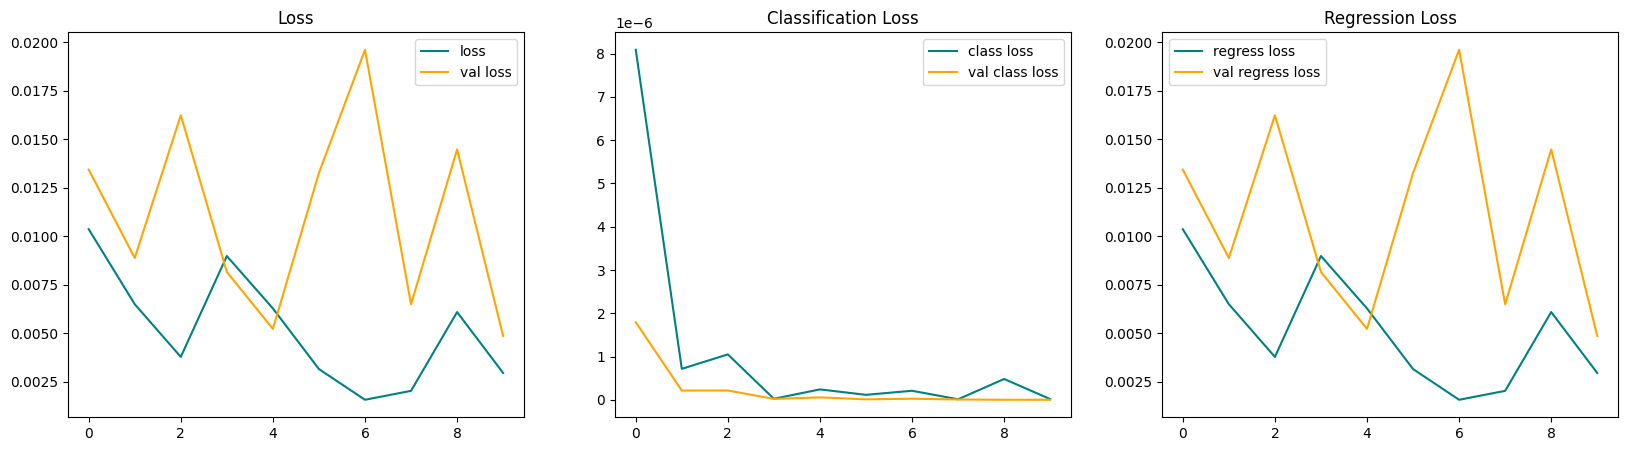

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

In [ ]:
test_data = test.as_numpy_iterator()
test_sample = test_data.next()
yhat = facetracker.predict(test_sample[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


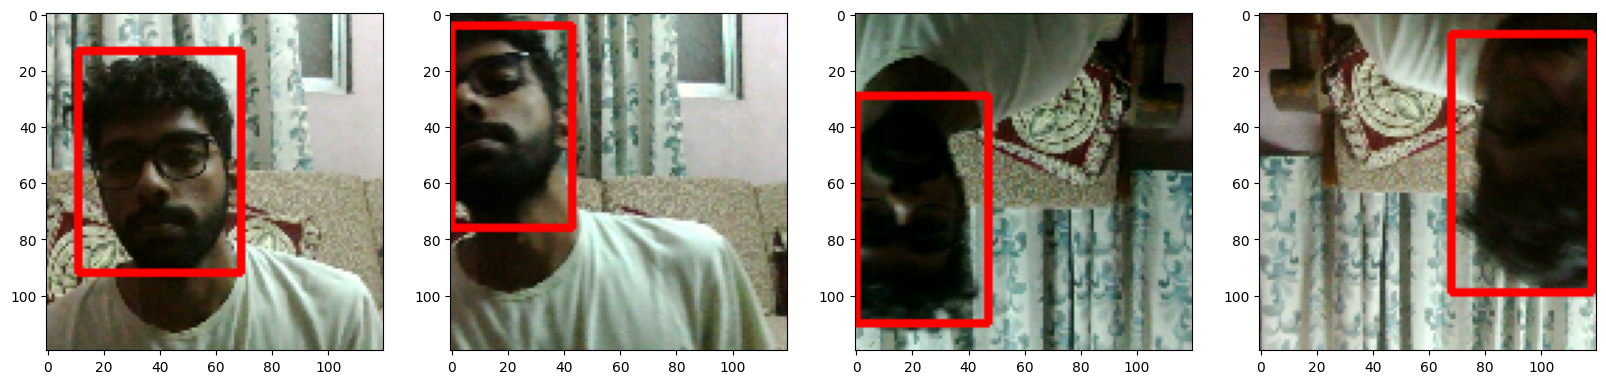

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4):
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx] # Corrected indexing

    # Make the image writable before drawing the rectangle
    sample_image_writable = np.copy(sample_image)

    cv2.rectangle(sample_image_writable,
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)),
                        (255,0,0), 2)

    ax[idx].imshow(sample_image_writable)

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
facetracker.save('/content/drive/MyDrive/facetracker.h5')
facetracker = load_model('/content/drive/MyDrive/facetracker.h5')

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]

    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))

    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]

    if yhat[0] > 0.5:
        # Controls the main rectangle
        cv2.rectangle(frame,
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)),
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame,
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])),
                            (255,0,0), -1)

        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)

    cv2.imshow('EyeTrack', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()